In [31]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score
df = pd.read_csv('CarPrice_Assignment.csv')

In [33]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [35]:
df.describe

<bound method NDFrame.describe of      car_ID  symboling                   CarName fueltype aspiration  \
0         1          3        alfa-romero giulia      gas        std   
1         2          3       alfa-romero stelvio      gas        std   
2         3          1  alfa-romero Quadrifoglio      gas        std   
3         4          2               audi 100 ls      gas        std   
4         5          2                audi 100ls      gas        std   
..      ...        ...                       ...      ...        ...   
200     201         -1           volvo 145e (sw)      gas        std   
201     202         -1               volvo 144ea      gas      turbo   
202     203         -1               volvo 244dl      gas        std   
203     204         -1                 volvo 246   diesel      turbo   
204     205         -1               volvo 264gl      gas      turbo   

    doornumber      carbody drivewheel enginelocation  wheelbase  ...  \
0          two  convertible 

In [37]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [39]:
df.fillna(method='ffill', inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_27412\3970806690.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [41]:
df = pd.get_dummies(df, drop_first = True)

In [43]:
X = df.drop('price', axis =1)
y  = df['price']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [51]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [53]:
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 176760096.86095348
R-squared: -1.2390561677927034


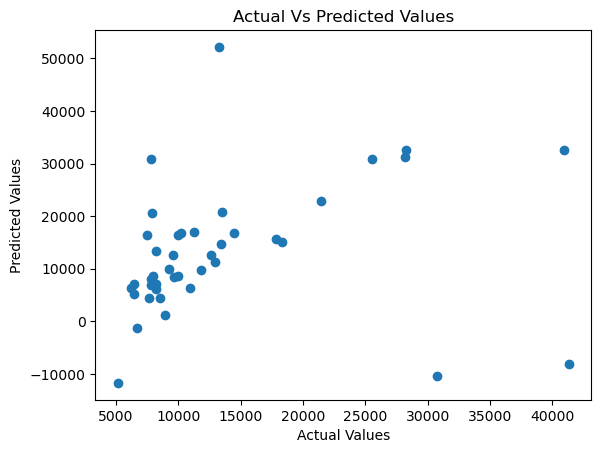

In [55]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual Vs Predicted Values')
plt.show()

In [57]:
#save the model
import joblib
joblib.dump(model, 'model.pkl')

['model.pkl']

In [ ]:
'''DELIVERABLE: A NOTEBOOK
 DEMONSTRATING FEATURE SELECTION,
 MODEL TRAINING, AND EVALUATION.'''

In [63]:
from sklearn.feature_selection import SelectKBest, f_regression 
import joblib

In [69]:
# Feature Selection
#select the top k features
k = 10 #number of feature to select 
selector = SelectKBest(score_func=f_regression, k=k)
X_new = selector.fit_transform(X,y)

In [71]:
selected_features = X.columns[selector.get_support()]
print(selected_features)

Index(['carlength', 'carwidth', 'curbweight', 'enginesize', 'horsepower',
       'citympg', 'highwaympg', 'drivewheel_fwd', 'drivewheel_rwd',
       'cylindernumber_four'],
      dtype='object')


In [73]:
#Split the Data
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.2, random_state=42)

In [75]:
#train the model
model = LinearRegression() #intialize the model
model.fit(X_train, y_train) #Train the model

LinearRegression()

In [77]:
#evaluate the Model
d = model.predict(X_test)
mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-Squared: {r2}')

Mean Squared Error: 176760096.86095348
R-Squared: -1.2390561677927034


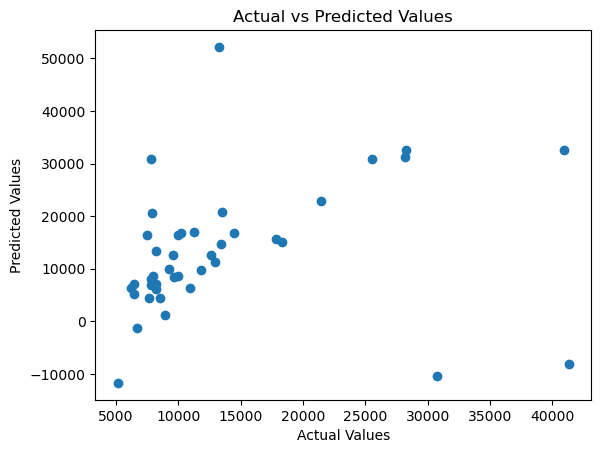

In [79]:
#visualize the Results
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

In [81]:
#save the model
joblib.dump(model, 'model.pkl')

['model.pkl']